# Question 1

[link to the page of datasets](https://files.grouplens.org/datasets/movielens/ml-latest-README.html)

## Import what you need

In [ ]:
pip install bar_chart_race

In [ ]:
pip install wordcloud

In [ ]:
pip install mpl_chord_diagram

In [ ]:
import psycopg2
import bar_chart_race
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from collections import Counter
from matplotlib.ticker import MultipleLocator
import bar_chart_race as bcr
from mpl_chord_diagram import chord_diagram
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from textblob import TextBlob

## Establish connection to PostgreSQL


In [ ]:
conn = psycopg2.connect(
    host="34.89.96.247",
    database="movies_database",
    user="postgres",
    password="UCL_ECON_0128",
    port="5432"
)

## Movies dataframe

In [ ]:
# Define the SQL query to read the movies table into a Pandas DataFrame
query = "SELECT * FROM movies"

# Read the query result into a Pandas DataFrame
movies_df = pd.read_sql(query, conn)

# Close the database connection
# conn.close()

# Print the first 5 rows of the DataFrame
movies_df.head()

In [ ]:
movies_df['year'] = movies_df['title'].str.extract('\((\d{4})\)', expand=False)
movies_df.head()

movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995

In [ ]:
movies_df.dropna(subset=['year'], inplace=True)

## Change dataframe format

In [ ]:
num_null_genres = movies_df['genres'].isnull().sum()
num_empty_genres = (movies_df['genres'] == '').sum()
num_rows_no_genres = num_null_genres + num_empty_genres
print(f"Number of rows with NaN or empty 'genres' values: {num_rows_no_genres}")

Number of rows with NaN or empty 'genres' values: 0


In [ ]:
# Create a list of all genres
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Loop over each genre and add a new column to movies_df
for genre in genres:
    movies_df[genre] = movies_df['genres'].str.contains(genre)

In [ ]:
movies_df.head()

movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  year  Action  Adventure  \
0  Adventure|Animation|Children|Comedy|Fantasy  1995   False       True   
1                   Adventure|Children|Fantasy  1995   False       True   
2                               Comedy|Romance  1995   False      False   
3                         Comedy|Drama|Romance  1995   False      False   
4                                       Comedy  1995   False      False   

   Animation  Children  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
0       True      True    True  False  ...     True      False   False   
1      False      True   False  False  ...     True      False   False   
2      False     False    True  False  ...    False      False   False   
3      False     False    True  False  ...    False      False   False   
4      False     False    True  False  ...    False      False   False   

   Musical  Mystery  Romance  Sci-Fi  Thriller    War  Western  
0    False    False    False   False     False  False    False  
1    False    False    False   False     False  False    False  
2    False    False     True   False     False  False    False  
3    False    False     True   False     False  False    False  
4    False    False    False   False     False  False    False  

[5 rows x 22 columns]

In [ ]:
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Create a new DataFrame to hold the results
year_genre_count = pd.DataFrame(columns=['year'] + genre_columns)

# Group the movies by year and count the number of movies with each genre in each year
for year, group in movies_df.groupby('year'):
    row = {'year': year}
    for genre in genre_columns:
        row[genre] = group[genre].sum()
    year_genre_count = year_genre_count.append(row, ignore_index=True)

In [ ]:
year_genre_count

year Action Adventure Animation Children Comedy Crime Documentary Drama  \
0    1874      0         0         0        0      0     0           1     0   
1    1878      0         0         0        0      0     0           0     0   
2    1880      0         0         0        0      0     0           1     0   
3    1883      0         0         0        0      0     0           0     0   
4    1887      0         0         0        0      0     0           0     0   
..    ...    ...       ...       ...      ...    ...   ...         ...   ...   
130  2015    243       137       102      121    626   138         359   926   
131  2016    257       121       100      105    622   138         354   891   
132  2017    261       113       113       88    594   143         331   864   
133  2018    237        95        86       76    503   127         288   737   
134  2019    122        47        54       50    254    74         124   387   

    Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War  \
0         0         0      0       0       0       0      0        0   0   
1         0         0      0       0       0       0      0        0   0   
2         0         0      0       0       0       0      0        0   0   
3         0         0      0       0       0       0      0        0   0   
4         0         0      0       0       0       0      0        0   0   
..      ...       ...    ...     ...     ...     ...    ...      ...  ..   
130      91         0    285       2     103     236    160      396  38   
131      86         0    261       0     109     232    132      414  33   
132      85         0    275       0     106     195    151      385  40   
133      92         0    239       0      85     145    135      339  31   
134      35         0    121       0      43      70     55      178  19   

    Western  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
130      14  
131      15  
132      15  
133      16  
134       7  

[135 rows x 19 columns]

In [ ]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
year_genre_count['Total'] = year_genre_count.loc[:, genre_cols].sum(axis=1)

In [ ]:
year_genre_count = year_genre_count.astype(float)

In [ ]:
year_genre_count['Action_pct'] = year_genre_count['Action'] / year_genre_count['Total'] * 100
year_genre_count

In [ ]:
for col in genre_cols:
    year_genre_count[col + '_pct'] = np.where(year_genre_count['Total'] != 0,
                                               year_genre_count[col] / year_genre_count['Total']*100,
                                               0)
year_genre_count

## Evolution of Movie Genres

In [ ]:
year_genre_count_filtered = year_genre_count[year_genre_count['year'] >= 1925]
# Calculate the average percentage share for each genre across all years and sort the genres in descending order
genre_order = year_genre_count_filtered[[col + '_pct' for col in genre_cols]].mean().sort_values(ascending=False).index.tolist()

# Melt the year_genre_count dataframe to make it long-form
melted_df = year_genre_count_filtered.melt(id_vars=['year'], value_vars=[col + '_pct' for col in genre_cols])

# Create the stacked area chart with sorted genre order
fig = px.area(melted_df, x='year', y='value', color='variable', title='Evolution of movie genres over time (1925 to 2019)', category_orders={'variable': genre_order})
fig.update_layout(xaxis=dict(dtick=10), yaxis_title='Percentage share of genre', xaxis_title='Year', yaxis_range=[1, 100], title_x=0.5, height=800, width=1300)

# Remove 0 tick from y-axis
fig.update_yaxes(tickvals=list(range(0, 101, 20)))

# Format y-axis tick labels to show two decimal places and include % sign
fig.update_traces(hovertemplate='%{y:.2f}')
fig.for_each_trace(lambda t: t.update(name=t.name.replace('_pct', '')))
fig.update_layout(legend_title_text='Movie genres')

fig.show()
plt.savefig('my_plot.png')


<Figure size 640x480 with 0 Axes>

test

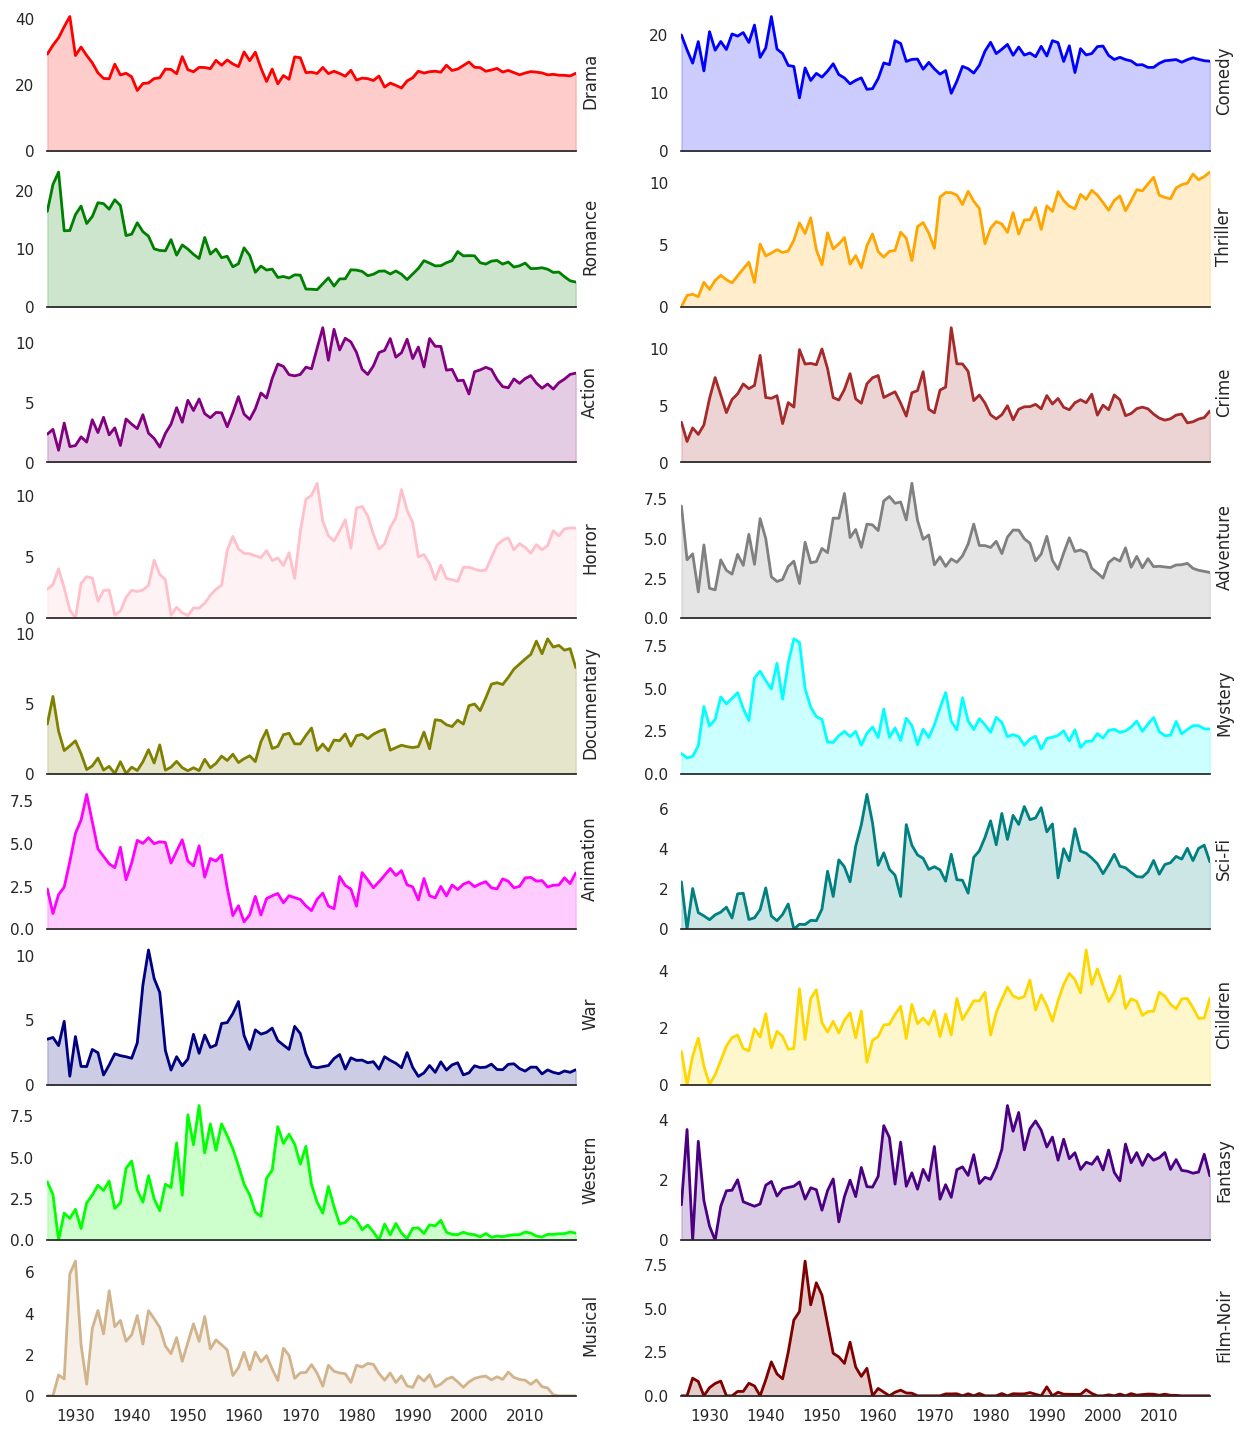

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Get the columns that end with '_pct'
genre_cols = [col for col in year_genre_count_filtered.columns if col.endswith('_pct')]

# Calculate the average percentage share for each genre across all years and sort the genres in descending order
genre_order = year_genre_count_filtered[[col for col in genre_cols]].mean().sort_values(ascending=False).index.tolist()

# Create a figure and axis object for each plot, using the sorted genre order
fig, axs = plt.subplots(len(genre_cols)//2, 2, figsize=(15, 2*len(genre_cols)//2), sharex=True)
axs = axs.flatten()
for i, genre_col in enumerate(genre_order):
    year = year_genre_count_filtered['year']
    genre_pct = year_genre_count_filtered[genre_col]

    # Plot the data and fill area below the curve with different color
    axs[i].plot(year, genre_pct, linewidth=2, color=colors[i])
    axs[i].fill_between(year, genre_pct, color=colors[i], alpha=0.2)

    # Turn off top and right borders and ticks
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].tick_params(right=False, top=False, left=False)

    axs[i].set_xlim(1925, 2019)
    axs[i].set_ylabel(genre_col.replace('_pct', ''))
    axs[i].yaxis.set_label_position("right")
    axs[i].set_ylim(bottom=0)
    axs[i].xaxis.set_major_locator(MultipleLocator(10))
    axs[i].tick_params(axis='y', labelrotation=0)

# Adjust the vertical spacing between subplots
fig.subplots_adjust(hspace=0.1)

# Show the plot
plt.show()
fig.savefig('myplot.png', dpi=300)
files.download('myplot.png')

# Question 2

## Ratings dataset

In [ ]:
# retrieve data from ratings table
query = "SELECT * FROM ratings"
ratings_df = pd.read_sql(query, conn)

<ipython-input-22-e30276f23dc1>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ratings_df = pd.read_sql(query, conn)


## Subset of huge dataset

In [ ]:
subset_ratings_df = ratings_df.sample(n=100000)
subset_ratings_df

user_id  movie_id                 timestamp  rating
6393779     33084      1207 2019-11-13 02:23:40+00:00     4.5
13027325    76019      2065 2018-12-28 09:05:04+00:00     4.0
6421247     33268       440 1996-06-10 10:04:41+00:00     4.0
22919633   140574       170 2000-10-03 04:09:45+00:00     4.0
7244772     38509      1206 2019-10-05 18:39:52+00:00     4.5
...           ...       ...                       ...     ...
4365617     20169      2941 1999-10-10 16:18:12+00:00     5.0
6294626     32497       555 2006-02-09 02:33:31+00:00     5.0
23230284   142543       539 1996-10-07 12:57:20+00:00     3.0
19056167   115077     47610 2018-01-04 18:02:31+00:00     3.0
5996852     30671       923 2017-01-08 05:22:49+00:00     3.5

[100000 rows x 4 columns]

## Merge movies and rating datasets

In [ ]:
merged_df = pd.merge(subset_ratings_df, movies_df, on='movie_id', how='left')
merged_df["timestamp"] = pd.to_datetime(merged_df["timestamp"], utc=True)
merged_df

user_id  movie_id                 timestamp  rating  \
0        33084      1207 2019-11-13 02:23:40+00:00     4.5   
1        76019      2065 2018-12-28 09:05:04+00:00     4.0   
2        33268       440 1996-06-10 10:04:41+00:00     4.0   
3       140574       170 2000-10-03 04:09:45+00:00     4.0   
4        38509      1206 2019-10-05 18:39:52+00:00     4.5   
...        ...       ...                       ...     ...   
99995    20169      2941 1999-10-10 16:18:12+00:00     5.0   
99996    32497       555 2006-02-09 02:33:31+00:00     5.0   
99997   142543       539 1996-10-07 12:57:20+00:00     3.0   
99998   115077     47610 2018-01-04 18:02:31+00:00     3.0   
99999    30671       923 2017-01-08 05:22:49+00:00     3.5   

                                  title                           genres  \
0          To Kill a Mockingbird (1962)                            Drama   
1      Purple Rose of Cairo, The (1985)     Comedy|Drama|Fantasy|Romance   
2                           Dave (1993)                   Comedy|Romance   
3                        Hackers (1995)  Action|Adventure|Crime|Thriller   
4            Clockwork Orange, A (1971)      Crime|Drama|Sci-Fi|Thriller   
...                                 ...                              ...   
99995              South Pacific (1958)              Musical|Romance|War   
99996               True Romance (1993)                   Crime|Thriller   
99997       Sleepless in Seattle (1993)             Comedy|Drama|Romance   
99998           Illusionist, The (2006)    Drama|Fantasy|Mystery|Romance   
99999               Citizen Kane (1941)                    Drama|Mystery   

       year Action Adventure Animation  ... Fantasy Film-Noir Horror Musical  \
0      1962  False     False     False  ...   False     False  False   False   
1      1985  False     False     False  ...    True     False  False   False   
2      1993  False     False     False  ...   False     False  False   False   
3      1995   True      True     False  ...   False     False  False   False   
4      1971  False     False     False  ...   False     False  False   False   
...     ...    ...       ...       ...  ...     ...       ...    ...     ...   
99995  1958  False     False     False  ...   False     False  False    True   
99996  1993  False     False     False  ...   False     False  False   False   
99997  1993  False     False     False  ...   False     False  False   False   
99998  2006  False     False     False  ...    True     False  False   False   
99999  1941  False     False     False  ...   False     False  False   False   

      Mystery Romance Sci-Fi Thriller    War Western  
0       False   False  False    False  False   False  
1       False    True  False    False  False   False  
2       False    True  False    False  False   False  
3       False   False  False     True  False   False  
4       False   False   True     True  False   False  
...       ...     ...    ...      ...    ...     ...  
99995   False    True  False    False   True   False  
99996   False   False  False     True  False   False  
99997   False    True  False    False  False   False  
99998    True    True  False    False  False   False  
99999    True   False  False    False  False   False  

[100000 rows x 25 columns]

In [ ]:
unique_user_count = merged_df['user_id'].nunique()
print("Number of unique user_id in merged_df:", unique_user_count)

Number of unique user_id in merged_df: 54977


## Do Genres Go Hand in Hand?

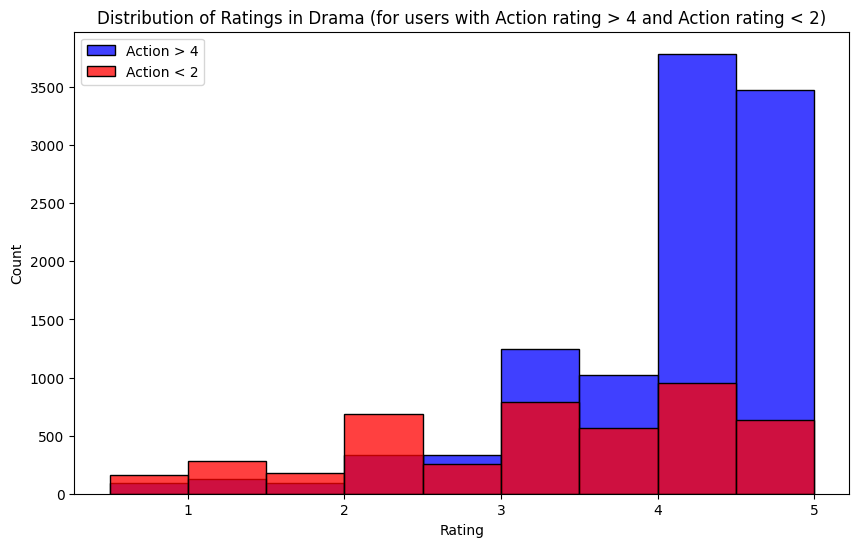

In [ ]:
# Step 1: Filter merged_df for Action=True and rating > 4
filtered_action_greater_df = merged_df[(merged_df['Action'] == True) & (merged_df['rating'] >= 4)]

# Step 2: Get the unique user_ids from the filtered DataFrame
user_ids_greater = filtered_action_greater_df['user_id'].unique()

# Step 3: Filter merged_df for Drama=True and matching user_ids with rating > 4
filtered_drama_greater_df = merged_df[(merged_df['Drama'] == True) & (merged_df['user_id'].isin(user_ids_greater))]

# Step 4: Filter merged_df for Action=True and rating < 2
filtered_action_less_df = merged_df[(merged_df['Action'] == True) & (merged_df['rating'] <= 2)]

# Step 5: Get the unique user_ids from the filtered DataFrame
user_ids_less = filtered_action_less_df['user_id'].unique()

# Step 6: Filter merged_df for Drama=True and matching user_ids with rating < 2
filtered_drama_less_df = merged_df[(merged_df['Drama'] == True) & (merged_df['user_id'].isin(user_ids_less))]

# Step 7: Create a distribution plot of ratings in Drama for users with rating > 4 in Action
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_drama_greater_df, x='rating', color='blue', binwidth=0.5, label='Action > 4')

# Step 8: Create a distribution plot of ratings in Drama for users with rating < 2 in Action
sns.histplot(data=filtered_drama_less_df, x='rating', color='red', binwidth=0.5, label='Action < 2')

# Set the plot title and labels
plt.title('Distribution of Ratings in Drama (for users with Action rating > 4 and Action rating < 2)')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the legend
plt.legend()

# Display the plot
plt.show()


## Rate Trends and Patterns


<ipython-input-40-14b57f9286c1>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


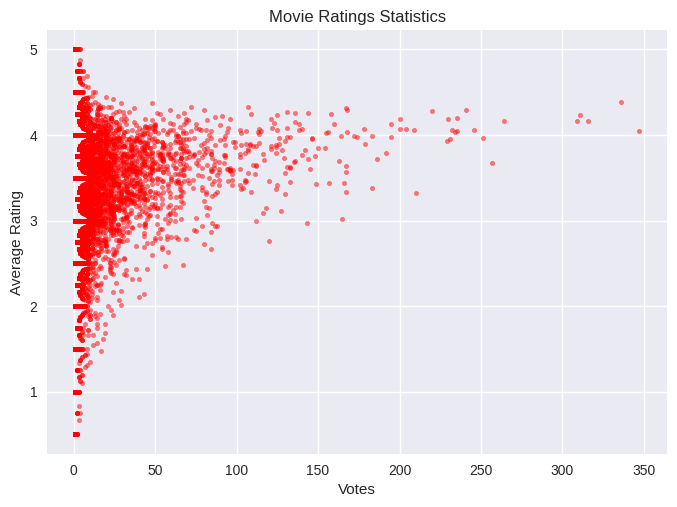

In [ ]:
# Group by movie_id and calculate the count and average rating
movie_stats = merged_df.groupby('movie_id').agg({'rating': ['count', 'mean']})

# Rename the columns for clarity
movie_stats.columns = ['count', 'average_rating']

# Plot the chart
plt.style.use("seaborn")
plt.scatter(movie_stats['count'], movie_stats['average_rating'], alpha=0.5, color="red", s=10)
plt.xlabel('Votes')
plt.ylabel('Average Rating')
plt.title('Movie Ratings Statistics')
plt.show()

In [ ]:
unique_movie_ids = merged_df['movie_id'].nunique()
print("Number of unique movie IDs:", unique_movie_ids)

Number of unique movie IDs: 10126


## Genre-wise Average Ratings

In [ ]:
# create a list of all genres
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# create an empty dataframe
yearly_avg_ratings = pd.DataFrame(columns=["year"] + genres + ["average_rating"])

# create a dictionary to keep track of the genre columns
genre_columns = {genre: i+1 for i, genre in enumerate(genres)}

# loop through each year and genre
for year in range(1997, 2020):
    for genre in genres:
        # filter the data for the current year and genre
        year_genre_df = merged_df[(merged_df["timestamp"].dt.year < year) & (merged_df[genre] == True)]
        # calculate the average rating for the current year and genre
        avg_rating = np.mean(year_genre_df["rating"])
        # add the year, genre, average rating, and action to the new dataframe
        row = {"year": year, "average_rating": avg_rating}
        row.update({genre: 1}) # set the value of the current genre column to 1
        yearly_avg_ratings = yearly_avg_ratings.append(row, ignore_index=True)

In [ ]:
# Get the columns to multiply
columns_to_multiply = yearly_avg_ratings.columns.drop(["year", "average_rating"])

# Multiply the columns
yearly_avg_ratings[columns_to_multiply] = yearly_avg_ratings[columns_to_multiply].mul(yearly_avg_ratings["average_rating"], axis=0)

# Drop the "average_rating" column
yearly_avg_ratings.drop("average_rating", axis=1, inplace=True)

yearly_avg_ratings

In [ ]:
# Find the maximum value for each year
max_ratings = yearly_avg_ratings.groupby("year").max().reset_index()

# Merge with the original DataFrame to filter the rows
max_ratings_df = pd.merge(yearly_avg_ratings, max_ratings, on=["year"], how="inner")
max_ratings_df

In [ ]:
# Keep only one row per unique value in the "year" column
max_ratings_df = yearly_avg_ratings.groupby("year").first().reset_index()
max_ratings_df

In [ ]:
# Convert "year" column to datetime data type
max_ratings_df["year"] = pd.to_datetime(max_ratings_df["year"], format="%Y")

# Set the "year" column as the index and rename the index to "date"
max_ratings_df = max_ratings_df.set_index("year").rename_axis("date")
max_ratings_df

Action  Adventure  Animation  Children    Comedy     Crime  \
date                                                                       
1997-01-01  3.490446   3.512195   3.725166  3.459732  3.408652  3.672481   
1998-01-01  3.513957   3.542162   3.742647  3.488429  3.430547  3.689199   
1999-01-01  3.490409   3.531250   3.753394  3.486279  3.419810  3.689297   
2000-01-01  3.477902   3.504885   3.734300  3.491883  3.459810  3.717097   
2001-01-01  3.475589   3.518536   3.701525  3.447145  3.479959  3.723672   
2002-01-01  3.471199   3.516845   3.680297  3.444337  3.469302  3.720744   
2003-01-01  3.470645   3.511497   3.670302  3.442198  3.466804  3.715707   
2004-01-01  3.456119   3.501431   3.659041  3.426672  3.457012  3.701890   
2005-01-01  3.443014   3.488396   3.645223  3.415593  3.442723  3.681859   
2006-01-01  3.420672   3.472877   3.640867  3.394714  3.422876  3.661046   
2007-01-01  3.410385   3.465808   3.625057  3.387679  3.415015  3.657902   
2008-01-01  3.403549   3.465799   3.621992  3.387785  3.411154  3.653383   
2009-01-01  3.406437   3.462625   3.613162  3.385163  3.407461  3.657742   
2010-01-01  3.413371   3.465494   3.617047  3.387447  3.407111  3.657384   
2011-01-01  3.417225   3.467723   3.618698  3.394269  3.408187  3.661635   
2012-01-01  3.420743   3.469056   3.623388  3.398703  3.410349  3.665935   
2013-01-01  3.428046   3.476199   3.629656  3.406456  3.413645  3.671455   
2014-01-01  3.437059   3.482753   3.634163  3.411462  3.417655  3.673998   
2015-01-01  3.438960   3.485841   3.637805  3.414651  3.418994  3.676511   
2016-01-01  3.447343   3.495069   3.630585  3.417728  3.420662  3.677036   
2017-01-01  3.450692   3.497777   3.627146  3.417064  3.422173  3.677507   
2018-01-01  3.456403   3.503240   3.619090  3.422542  3.421182  3.681648   
2019-01-01  3.460506   3.505911   3.609804  3.424043  3.420585  3.681838   

            Documentary     Drama   Fantasy  Film-Noir    Horror   Musical  \
date                                                                         
1997-01-01     3.703704  3.705931  3.505176   3.785714  3.528634  3.622378   
1998-01-01     3.660000  3.698949  3.486376   3.833333  3.440111  3.628641   
1999-01-01     3.678571  3.700250  3.482339   3.898305  3.388889  3.622517   
2000-01-01     3.850000  3.721860  3.469237   3.950704  3.338667  3.643713   
2001-01-01     3.876543  3.725497  3.464343   4.085020  3.292776  3.644776   
2002-01-01     3.851064  3.717231  3.461504   4.084507  3.265183  3.622896   
2003-01-01     3.838863  3.716975  3.463658   4.106583  3.239153  3.609495   
2004-01-01     3.840081  3.708300  3.480944   4.100575  3.224762  3.606030   
2005-01-01     3.840984  3.693209  3.478228   4.089514  3.215644  3.583584   
2006-01-01     3.793506  3.682803  3.475092   4.061224  3.205647  3.559288   
2007-01-01     3.780911  3.677639  3.478074   4.058943  3.200301  3.549558   
2008-01-01     3.758350  3.672133  3.483025   4.047438  3.207677  3.545853   
2009-01-01     3.768750  3.672359  3.480401   4.039336  3.210426  3.538399   
2010-01-01     3.750812  3.672189  3.481064   4.030378  3.213205  3.535549   
2011-01-01     3.741840  3.671954  3.485946   4.028257  3.213833  3.531872   
2012-01-01     3.748611  3.672445  3.487504   4.017451  3.216656  3.534544   
2013-01-01     3.741787  3.674188  3.493292   3.992052  3.218594  3.532014   
2014-01-01     3.736444  3.676819  3.497493   3.974198  3.226935  3.533972   
2015-01-01     3.724820  3.677938  3.499865   3.959677  3.231954  3.532895   
2016-01-01     3.709003  3.680857  3.503115   3.965952  3.239423  3.522285   
2017-01-01     3.710298  3.677331  3.499510   3.959075  3.245456  3.521515   
2018-01-01     3.702905  3.678704  3.501336   3.944128  3.258163  3.517758   
2019-01-01     3.706271  3.678898  3.500693   3.944201  3.262238  3.516288   

             Mystery   Romance    Sci-Fi  Thriller       War   Western  
date                                                                    
1997-01-01  3.73

In [ ]:
bcr.bar_chart_race(max_ratings_df, label_bars = False, period_fmt='%Y', title='Average movies genre rate over time')

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


## Genre-Based Rating Trends

In [ ]:
# Define the genres list
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
          'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Define the years range
years = range(1997, 2021)

# Create an empty DataFrame with the desired columns
new_df = pd.DataFrame(columns=['date'] + genres)

# Iterate over the years
for year in years:
    # Create a condition based on the timestamp and year
    condition = (merged_df['timestamp'].dt.year < year)

    # Initialize a dictionary for the genre counts of the current year
    genre_counts = {}

    # Iterate over each genre in the genres list
    for genre in genres:
        # Count the number of True values for the current genre and year
        genre_count = merged_df.loc[condition & merged_df[genre], genre].sum()

        # Add the genre count to the dictionary
        genre_counts[genre] = genre_count

    # Create a dictionary for the new row to be added to the new DataFrame
    new_row = {'date': pd.to_datetime(str(year))}
    new_row.update(genre_counts)

    # Append the new row to the new DataFrame
    new_df = new_df.append(new_row, ignore_index=True)

# Convert all columns except 'date' to numeric data type
new_df[genres] = new_df[genres].apply(pd.to_numeric)

# Set the 'date' column as the index
new_df.set_index('date', inplace=True)

# Print the new DataFrame
new_df


<ipython-input-126-7841e35355cf>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-126-7841e35355cf>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-126-7841e35355cf>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-126-7841e35355cf>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-126-7841e35355cf>:33: FutureWarning: The frame.append method is deprecated and will be remove

Action  Adventure  Animation  Children  Comedy  Crime  \
date                                                                
1997-01-01    1727       1271        302       596    2173   1032   
1998-01-01    2436       1850        408       821    3110   1435   
1999-01-01    2763       2080        442       911    3473   1635   
2000-01-01    3756       2866        621      1232    5163   2287   
2001-01-01    5387       4181        918      1769    7809   3257   
2002-01-01    6458       4957       1076      2075    9512   3871   
2003-01-01    7256       5523       1192      2275   10709   4323   
2004-01-01    8204       6288       1377      2557   12201   4869   
2005-01-01    9397       7239       1570      2873   13845   5573   
2006-01-01   11257       8738       1938      3424   16454   6672   
2007-01-01   12470       9710       2183      3766   18068   7397   
2008-01-01   13582      10599       2410      4077   19348   8055   
2009-01-01   14835      11612       2682      4428   20856   8815   
2010-01-01   15751      12389       2892      4740   22037   9426   
2011-01-01   16708      13121       3134      5008   23134   9970   
2012-01-01   17500      13767       3335      5242   24099  10474   
2013-01-01   18220      14348       3517      5468   24932  10930   
2014-01-01   18843      14814       3656      5636   25642  11299   
2015-01-01   19397      15255       3817      5788   26208  11665   
2016-01-01   21621      16933       4342      6284   28221  12907   
2017-01-01   24134      18894       4951      6921   30523  14098   
2018-01-01   26447      20676       5584      7546   32740  15197   
2019-01-01   28283      22077       6079      8044   34408  16105   
2020-01-01   29866      23358       6493      8441   35804  16885   

            Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
date                                                                           
1997-01-01           27   2428      483         14     227      286      294   
1998-01-01           50   3521      734         42     359      412      472   
1999-01-01           56   4000      821         59     450      453      570   
2000-01-01          100   5979     1219        142     750      668      911   
2001-01-01          162   9111     1865        247    1315     1005     1440   
2002-01-01          188  10963     2221        284    1663     1188     1705   
2003-01-01          211  12324     2504        319    1936     1306     1956   
2004-01-01          247  13939     2860        348    2209     1476     2230   
2005-01-01          305  15786     3307        391    2525     1663     2560   
2006-01-01          385  18550     4055        441    2993     1965     3066   
2007-01-01          461  20308     4538        492    3325     2149     3375   
2008-01-01          509  21922     4978        527    3621     2279     3701   
2009-01-01          560  23805     5485        572    3923     2461     4020   
2010-01-01          616  25170     5862        609    4165     2588     4304   
2011-01-01          674  26574     6297        637    4417     2714     4570   
2012-01-01          720  27803     6642        659    4611     2808     4832   
2013-01-01          761  28986     6932        692    4808     2905     5079   
2014-01-01          793  29977     7180        717    4975     2973     5274   
2015-01-01          834  30859     7422        744    5098     3040     5437   
2016-01-01          933  33850     8187        793    5578     3186     6031   
2017-01-01         1039  36866     9178        843    6107     3393     6586   
2018-01-01         1136  39655    10104        877    6707     3604     7191   
2019-01-01         1212  41792    10826        914    7150     3745     7677   
2020-01-01         1291  43723    11425        949    7589     3858     8094   

            Romance  Sci-Fi  Thriller   War  Western  
date                                                  
1997-01-01     1203     64

In [ ]:
bcr.bar_chart_race(new_df, label_bars = False, period_fmt='%Y', title='Number of votes based on movies genre over time')

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


## Exploring Genre Interconnections

In [ ]:
# Define the genres list
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
          'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Create an empty DataFrame with the genres as rows and columns
chord_df = pd.DataFrame(0, index=genres, columns=genres)

# Iterate over each genre in the genres list
for genre1 in genres:
    for genre2 in genres:
        # Count the number of rows in merged_df where both genre1 and genre2 are True
        count = np.sum((merged_df[genre1]) & (merged_df[genre2]))

        # Set the count in the corresponding cell of chord_df
        chord_df.loc[genre1, genre2] = count

# Print the chord_df
chord_df

In [ ]:
# Set zeros in the main diagonal of chord_df
np.fill_diagonal(chord_df.values, 0)
chord_df

Action  Adventure  Animation  Children  Comedy  Crime  \
Action            0      13391        854       784    5685   6611   
Adventure     13391          0       4035      4737    7131   1102   
Animation       854       4035          0      5053    3618    291   
Children        784       4737       5053         0    4715    248   
Comedy         5685       7131       3618      4715       0   4533   
Crime          6611       1102        291       248    4533      0   
Documentary      25         17          6         1     164      8   
Drama          7370       4645       1056      1565    9522   8659   
Fantasy        2904       6238       2607      3613    4950    404   
Film-Noir        90         42          1         0      14    679   
Horror         1638        421         61        27    1330    732   
Musical         138        994       1776      1978    2038     64   
Mystery        1698        723        150       198     700   2802   
Romance        2117       1866       1097      1081   10168    740   
Sci-Fi        10779       7819        711       726    2798    824   
Thriller      13116       5225         63        30    2679   9284   
War            2165        769         44        17    1094    189   
Western         760        625         29        41     513     70   

             Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
Action                25   7370     2904         90    1638      138     1698   
Adventure             17   4645     6238         42     421      994      723   
Animation              6   1056     2607          1      61     1776      150   
Children               1   1565     3613          0      27     1978      198   
Comedy               164   9522     4950         14    1330     2038      700   
Crime                  8   8659      404        679     732       64     2802   
Documentary            0    106        2          0       7       50       10   
Drama                106      0     2620        391    1386     1139     3711   
Fantasy                2   2620        0         23     874     1169      658   
Film-Noir              0    391       23          0      17        4      502   
Horror                 7   1386      874         17       0      136     1337   
Musical               50   1139     1169          4     136        0        6   
Mystery               10   3711      658        502    1337        6        0   
Romance                1  10184     2519         85     205     1331      755   
Sci-Fi                 3   3704      932         41    1806       88     1550   
Thriller               1  10383     1042        611    3895       34     5885   
War                   48   4269       86          1       8       26       22   
Western                0    790        7          2      23       23       46   

             Romance  Sci-Fi  Thriller   War  Western  
Action          2117   10779     13116  2165      760  
Adventure       1866    7819      5225   769      625  
Animation       1097     711        63    44       29  
Children        1081     726        30    17       41  
Comedy         10168    2798      2679  1094      513  
Crime            740     824      9284   189       70  
Documentary        1       3         1    48        0  
Drama          10184    3704     10383  4269      790  
Fantasy         2519     932      1042    86        7  
Film-Noir         85      41       611     1        2  
Horror           205    1806      3895     8       23  
Musical         1331      88        34    26       23  
Mystery          755    1550      5885    22       46  
Romance            0     801      1838  1106      196  
Sci-Fi           801       0      6750   106      167  
Thriller        1838    6750         0   572      136  
War             1106     106       572     0      109  
Western          196     167       136   109        0

In [ ]:
matrix = chord_df.values.tolist()
matrix = np.array(chord_df.values.tolist())
matrix

In [ ]:
names = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
          'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

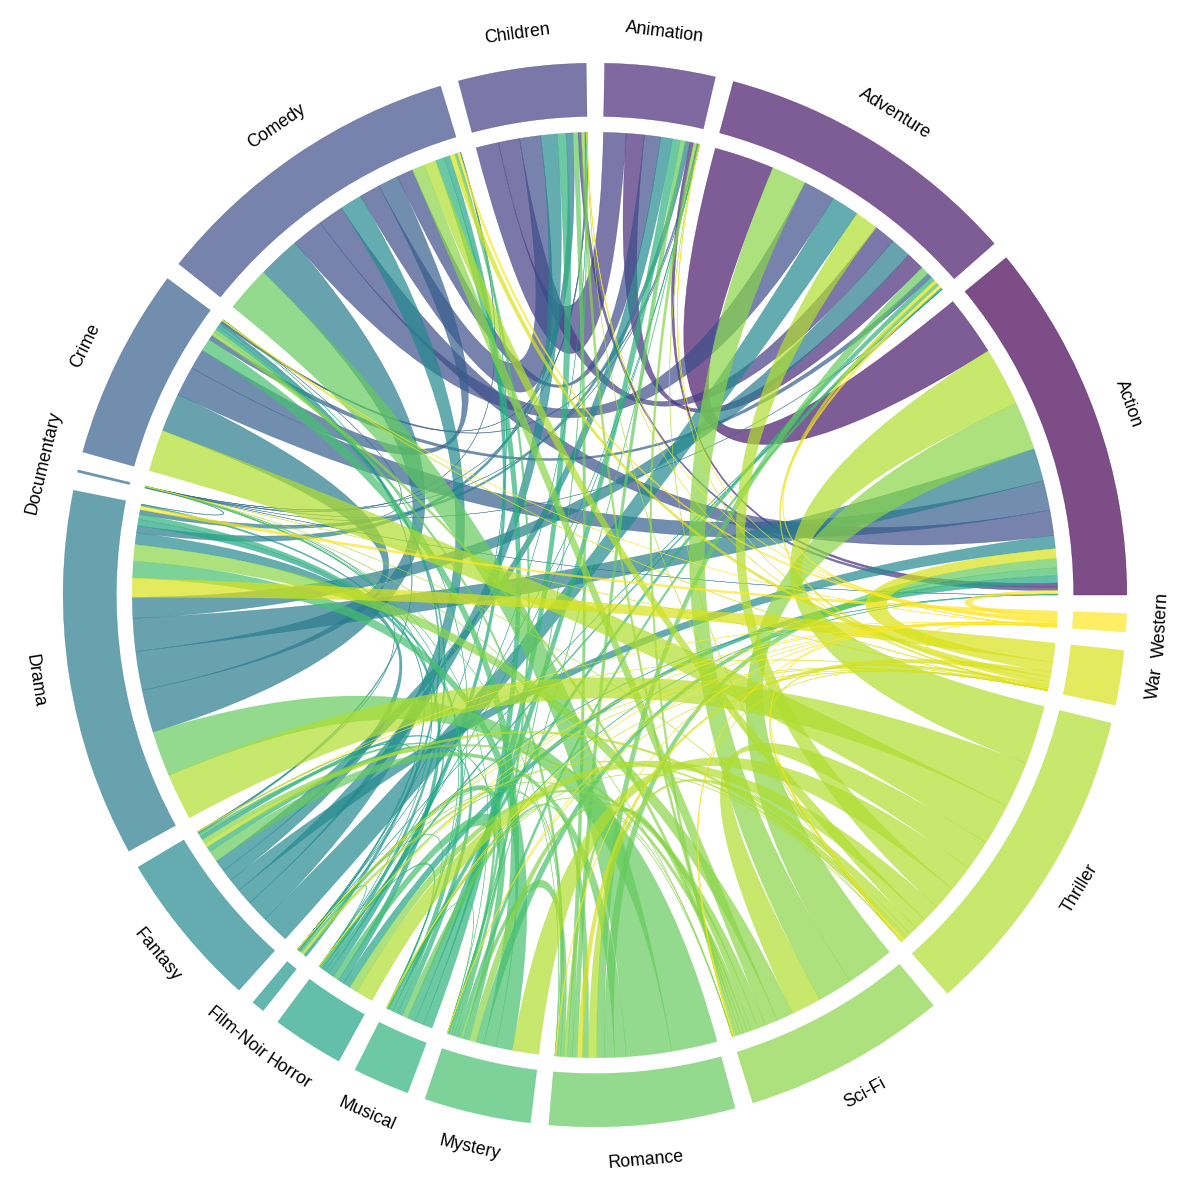

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 12))
chord_diagram(matrix, names, ax=ax1)
plt.show()

# Question 3

## Tags dataset

In [ ]:
# retrieve data from ratings table
query = "SELECT * FROM tags"
tags_df = pd.read_sql(query, conn)
tags_df

<ipython-input-108-2aef832b825e>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tags_df = pd.read_sql(query, conn)


tag_id  user_id  movie_id                  tag  \
0              0        3       260              classic   
1              1        3       260               sci-fi   
2              2        4      1732          dark comedy   
3              3        4      1732       great dialogue   
4              4        4      7569     so bad it's good   
...          ...      ...       ...                  ...   
1093355  1093355   162521     66934  Neil Patrick Harris   
1093356  1093356   162521    103341     cornetto trilogy   
1093357  1093357   162534    189169               comedy   
1093358  1093358   162534    189169             disabled   
1093359  1093359   162534    189169              robbery   

                        timestamp  
0       2015-08-13 13:25:55+00:00  
1       2015-08-13 13:24:16+00:00  
2       2019-11-16 22:33:18+00:00  
3       2019-11-16 22:33:24+00:00  
4       2019-11-16 22:30:55+00:00  
...                           ...  
1093355 2015-03-25 19:26:51+00:00  
1093356 2015-03-25 19:20:59+00:00  
1093357 2018-05-28 14:36:15+00:00  
1093358 2018-05-28 14:36:21+00:00  
1093359 2018-05-28 14:36:33+00:00  

[1093360 rows x 5 columns]

## Retrieve table names in SQL database

In [ ]:
# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="34.89.96.247",
    database="movies_database",
    user="postgres",
    password="UCL_ECON_0128",
    port="5432"
)

# Create a cursor object to execute SQL queries
cur = conn.cursor()

# Execute the SQL command to retrieve table names
cur.execute("""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = 'public'
""")

# Fetch all the table names
table_names = cur.fetchall()

# Print the table names
for name in table_names:
    print(name[0])

movies
ratings
tags


## Merge movies and tags datasets

In [ ]:
merged_ratings_df = pd.merge(movies_df, tags_df, on='movie_id')

# Display the merged DataFrame
merged_ratings_df.head()

movie_id             title                                       genres  \
0         1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1         1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2         1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3         1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4         1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   year  Action  Adventure  Animation  Children  Comedy  Crime  ...  Mystery  \
0  1995   False       True       True      True    True  False  ...    False   
1  1995   False       True       True      True    True  False  ...    False   
2  1995   False       True       True      True    True  False  ...    False   
3  1995   False       True       True      True    True  False  ...    False   
4  1995   False       True       True      True    True  False  ...    False   

   Romance  Sci-Fi  Thriller    War  Western  tag_id  user_id           tag  \
0    False   False     False  False    False    2306      791         Owned   
1    False   False     False  False    False    3749     1048  imdb top 250   
2    False   False     False  False    False    4226     1361         Pixar   
3    False   False     False  False    False   10003     3164         Pixar   
4    False   False     False  False    False   10004     3164   time travel   

                  timestamp  
0 2018-01-05 18:04:53+00:00  
1 2007-02-22 11:39:54+00:00  
2 2008-07-15 18:25:11+00:00  
3 2008-10-06 14:52:07+00:00  
4 2008-10-06 14:52:09+00:00  

[5 rows x 26 columns]

## Number of Tags in Each Genre

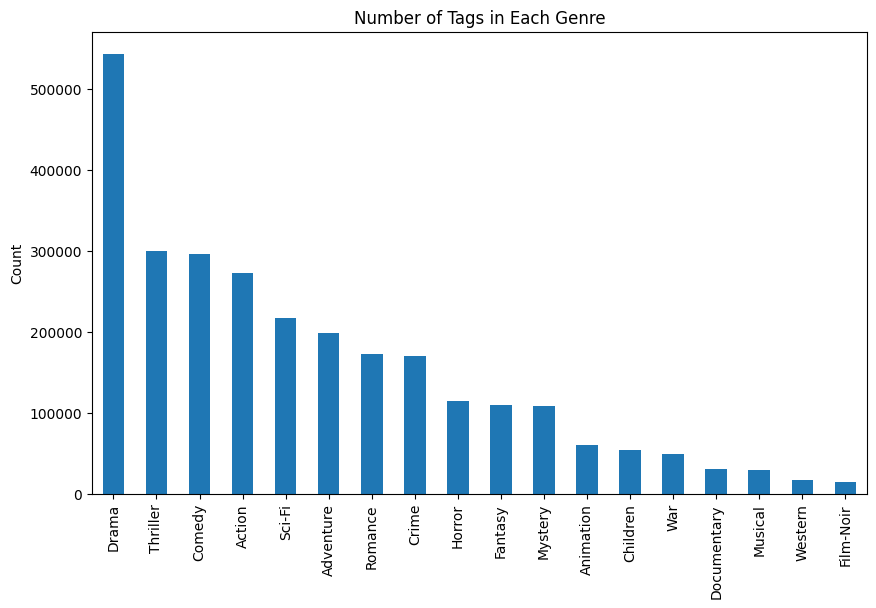

In [ ]:
# Define the list of genre columns
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Count the number of True values in each genre column
genre_counts = merged_ratings_df[genre_cols].sum()
genre_counts = genre_counts.sort_values(ascending=False)

# Plotting the genre counts
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.ylabel('Count')
plt.title('Number of Tags in Each Genre')
plt.show()

## Receiving tags after rating

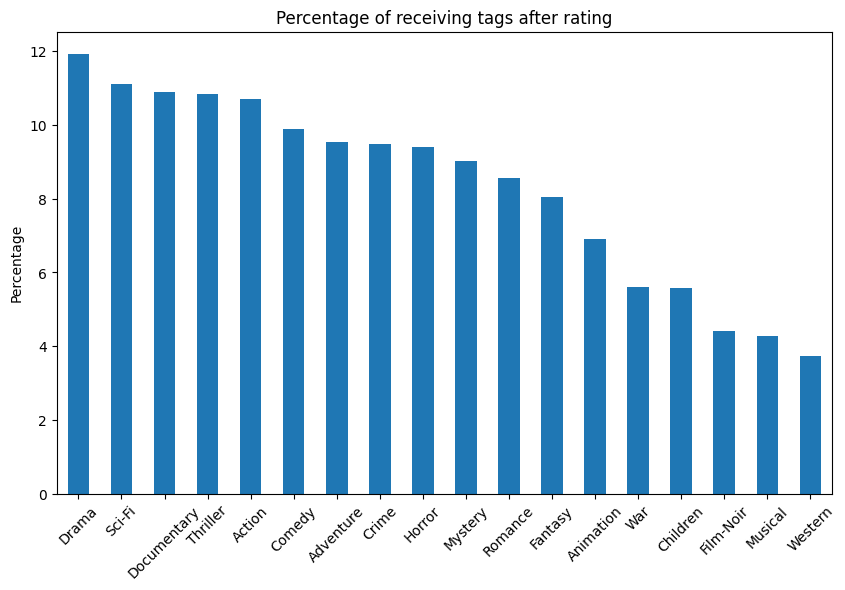

In [ ]:
genre_user_counts = {}

for genre in genre_cols:
    # Count the number of user_id values with non-null and True values in the genre column of merged_df
    genre_user_count = merged_df.loc[merged_df[genre].notnull() & merged_df[genre] & (merged_df['rating'] >= 0), 'user_id'].nunique()

    # Filter out missing values in the genre column of merged_ratings_df
    genre_ratings_filtered = merged_ratings_df[genre].notna() & merged_ratings_df[genre].astype(bool)

    # Count the number of user_id values from the above count that exist in merged_ratings_df
    genre_user_count_existing = merged_ratings_df.loc[merged_ratings_df['user_id'].isin(merged_df.loc[merged_df[genre].notnull() & merged_df[genre] & (merged_df['rating'] >= 0), 'user_id']) & genre_ratings_filtered, 'user_id'].nunique()

    # Calculate the ratio of genre_user_count_existing to genre_user_count
    genre_ratio = genre_user_count_existing*100 / genre_user_count if genre_user_count > 0 else np.nan

    # Store the ratio in a dictionary
    genre_user_counts[genre] = genre_ratio

# Convert the dictionary to a DataFrame
genre_user_counts_df = pd.DataFrame.from_dict(genre_user_counts, orient='index', columns=['Ratio'])
genre_user_counts_df.sort_values(by='Ratio', ascending=False, inplace=True)

# Plotting the genre ratios
genre_user_counts_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Percentage')
plt.title('Percentage of receiving tags after rating')
plt.legend().remove()
plt.xticks(rotation=45)
plt.show()


## Receiving tags after rating (2)

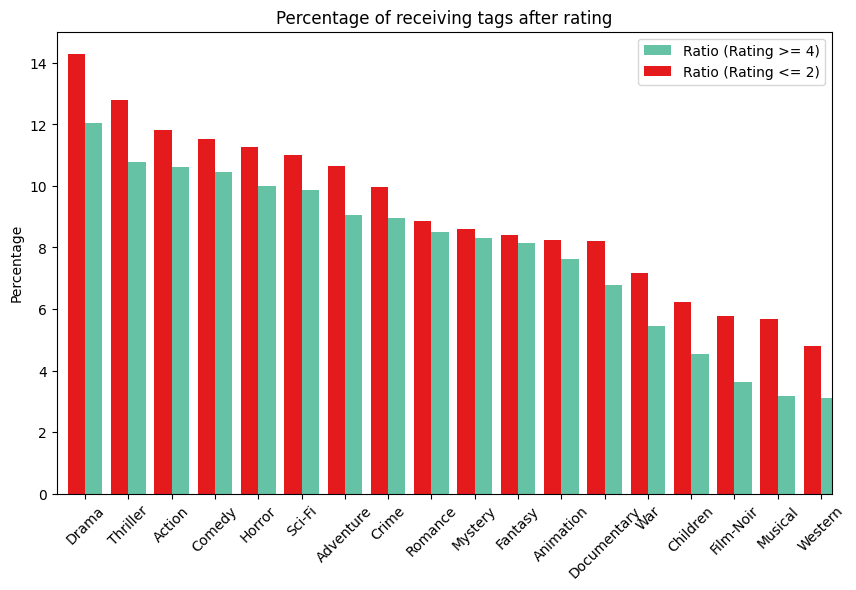

In [ ]:
genre_user_counts_4 = {}
genre_user_counts_2 = {}

for genre in genre_cols:
    # Count the number of user_id values with non-null and True values in the genre column of merged_df
    genre_user_count_4 = merged_df.loc[merged_df[genre].notnull() & merged_df[genre] & (merged_df['rating'] >= 4), 'user_id'].nunique()

    # Filter out missing values in the genre column of merged_ratings_df
    genre_ratings_filtered_4 = merged_ratings_df[genre].notna() & merged_ratings_df[genre].astype(bool)

    # Count the number of user_id values from the above count that exist in merged_ratings_df
    genre_user_count_existing_4 = merged_ratings_df.loc[merged_ratings_df['user_id'].isin(merged_df.loc[merged_df[genre].notnull() & merged_df[genre] & (merged_df['rating'] >= 4), 'user_id']) & genre_ratings_filtered_4, 'user_id'].nunique()

    # Count the number of user_id values with non-null and True values in the genre column of merged_df
    genre_user_count_2 = merged_df.loc[merged_df[genre].notnull() & merged_df[genre] & (merged_df['rating'] <= 2), 'user_id'].nunique()

    # Filter out missing values in the genre column of merged_ratings_df
    genre_ratings_filtered_2 = merged_ratings_df[genre].notna() & merged_ratings_df[genre].astype(bool)

    # Count the number of user_id values from the above count that exist in merged_ratings_df
    genre_user_count_existing_2 = merged_ratings_df.loc[merged_ratings_df['user_id'].isin(merged_df.loc[merged_df[genre].notnull() & merged_df[genre] & (merged_df['rating'] <= 2), 'user_id']) & genre_ratings_filtered_2, 'user_id'].nunique()


    # Calculate the ratio of genre_user_count_existing to genre_user_count for rating >= 4
    genre_ratio_4 = genre_user_count_existing_4 * 100 / genre_user_count_4 if genre_user_count > 0 else np.nan

    # Calculate the ratio of genre_user_count_existing to genre_user_count for rating <= 2
    genre_ratio_2 = genre_user_count_existing_2 * 100 / genre_user_count_2 if genre_user_count > 0 else np.nan

    # Store the ratios in dictionaries
    genre_user_counts_4[genre] = genre_ratio_4
    genre_user_counts_2[genre] = genre_ratio_2

# Convert the dictionaries to DataFrames
genre_user_counts_df_4 = pd.DataFrame.from_dict(genre_user_counts_4, orient='index', columns=['Ratio (Rating >= 4)'])
genre_user_counts_df_4.sort_values(by='Ratio (Rating >= 4)', ascending=False, inplace=True)

genre_user_counts_df_2 = pd.DataFrame.from_dict(genre_user_counts_2, orient='index', columns=['Ratio (Rating <= 2)'])
genre_user_counts_df_2.sort_values(by='Ratio (Rating <= 2)', ascending=False, inplace=True)

# Define a list of colors for each bar
colors_4 = sns.color_palette('Set2', len(genre_user_counts_df_4))
colors_2 = sns.color_palette('Set1', len(genre_user_counts_df_2))

# Plotting the genre ratios for rating >= 4 and rating <= 2
fig, ax = plt.subplots(figsize=(10, 6))

genre_user_counts_df_4.plot(kind='bar', ax=ax, color=colors_4, position=0, width=0.4, legend=False)
genre_user_counts_df_2.plot(kind='bar', ax=ax, color=colors_2, position=1, width=0.4, legend=False)

plt.ylabel('Percentage')
plt.title('Percentage of receiving tags after rating')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()


## Total Number of Tages

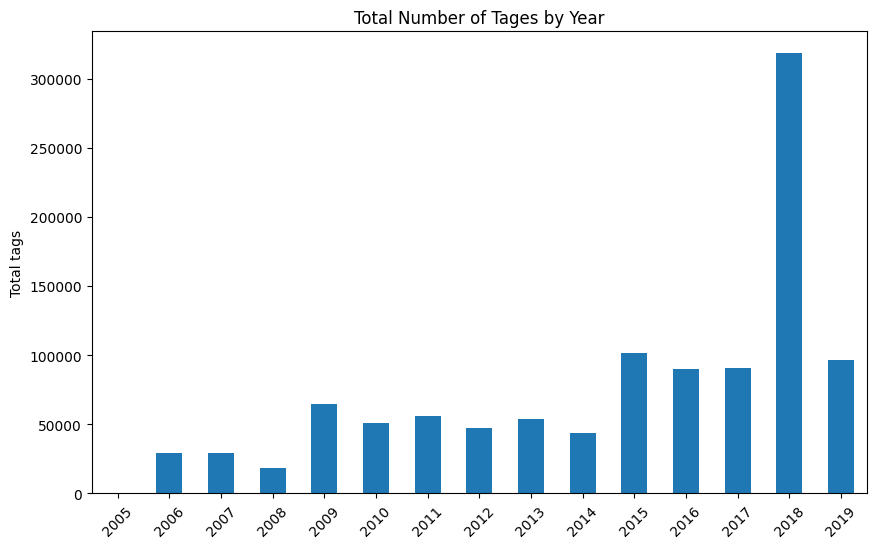

In [ ]:
# Extract the year from the timestamp column
merged_ratings_df['Year'] = merged_ratings_df['timestamp'].dt.year

# Count the number of rows for each year
year_counts = merged_ratings_df['Year'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.ylabel('Total tags')
plt.title('Total Number of Tages by Year')
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Tags wordcloud

<ipython-input-111-227482f07774>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


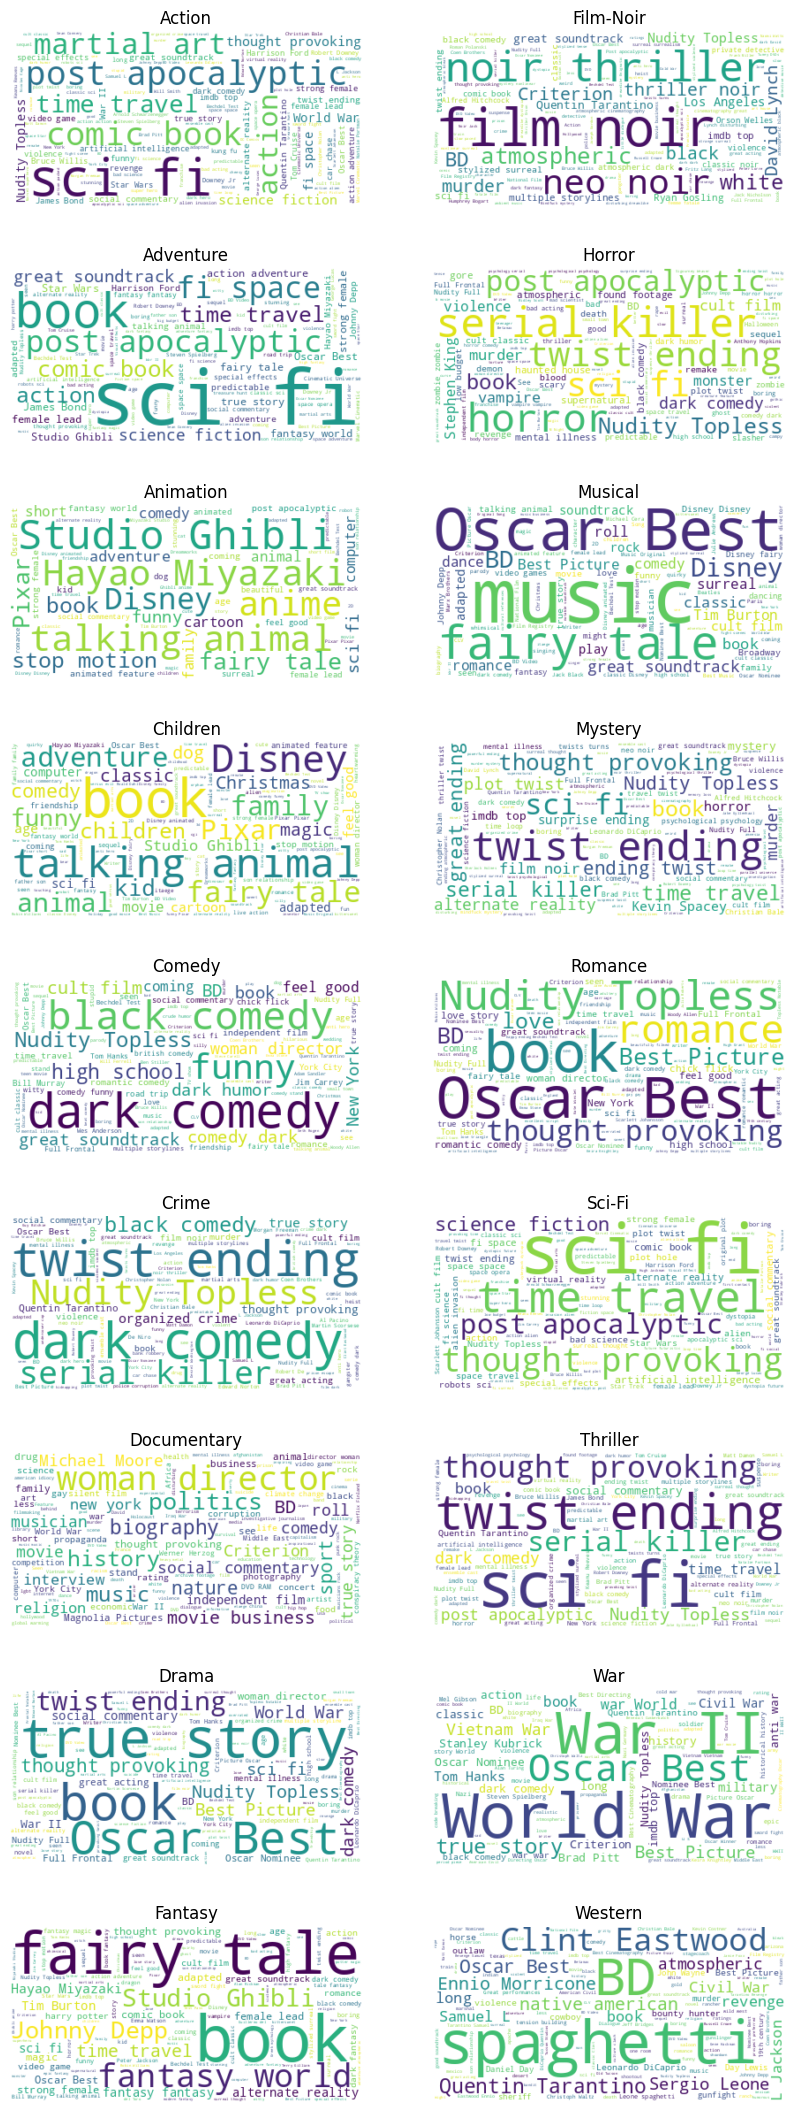

In [ ]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Create a subplot grid with 9 rows and 2 columns
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(10, 40), gridspec_kw={'hspace': -0.8})

# Iterate through each genre and generate a word cloud in a subplot
for i, genre in enumerate(genre_cols):
    # Filter the merged DataFrame based on the genre condition
    filtered_df = merged_ratings_df[merged_ratings_df[genre] == True]

    # Concatenate the "tag" column values into a single string
    text = " ".join(i for i in filtered_df['tag'])

    # Create a set of stopwords
    stop_words = ["sci fi", "based", "appealing", "film noir",
                  "visually", "animation", "musical", "documentary",
                  "western"] + list(STOPWORDS)

    # Generate the word cloud for the current genre
    wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

    # Set the current subplot for the genre
    ax = axes[i % 9, i // 9]

    # Plot the word cloud in the current subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(genre)  # Set the subplot title as the genre
    ax.axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


## Top tags in Action genre

In [ ]:
# Filter the merged DataFrame based on the conditions
filtered_df = merged_ratings_df[(merged_ratings_df['Action'] == True) & (merged_ratings_df['timestamp'] < '2008-01-01')]

# Concatenate the "tag" column values into a single string
text = " ".join(i for i in filtered_df['tag'])

# Split the text into individual words
words = text.split()

# Remove stopwords from the list of words
words_without_stopwords = [word for word in words if word.lower() not in STOPWORDS]

# Count the occurrence of each word
Counter(words_without_stopwords)

In [ ]:
# Create an empty DataFrame to store the word counts
df_word_counts = pd.DataFrame(columns=['date'])

# Iterate over each year from 2008 to 2019
for year in range(2008, 2020):
    # Filter the merged DataFrame based on the conditions
    filtered_df = merged_ratings_df[(merged_ratings_df['Action'] == True) & (merged_ratings_df['timestamp'] < str(year))]

    # Concatenate the "tag" column values into a single string
    text = " ".join(i for i in filtered_df['tag'])

    # Split the text into individual words
    words = text.split()

    # Remove stopwords from the list of words
    words_without_stopwords = [word for word in words if word.lower() not in STOPWORDS]

    # Count the occurrence of each word
    word_counts = Counter(words_without_stopwords)

    # Get the 50 most common words
    top_50_words = word_counts.most_common(50)

    # Create a dictionary to store the word counts
    word_counts_dict = {'date': [str(year) + '-01-01']}

    # Populate the dictionary with word counts
    for word, count in top_50_words:
        word_counts_dict[word] = [count]

    # Create a DataFrame from the word counts dictionary for the current year
    df_year_counts = pd.DataFrame(word_counts_dict)

    # Append the current year's word counts to the main DataFrame
    df_word_counts = df_word_counts.append(df_year_counts, ignore_index=True)

# Print the DataFrame
df_word_counts


In [ ]:
df_word_counts['date'] = df_word_counts['date'].str[:4].astype(int)
df_word_counts

In [ ]:
# Convert "year" column to datetime data type
df_word_counts["year"] = pd.to_datetime(df_word_counts["date"], format="%Y")

# Set the "year" column as the index and rename the index to "date"
df_word_counts = df_word_counts.set_index("year").rename_axis("date")

df_word_counts = df_word_counts.drop("date", axis=1)

df_word_counts

action    book   comic   seen  (Best  Oscar  sci-fi  movie  \
date                                                                     
2008-01-01   281.0   222.0   200.0  187.0  164.0  156.0   154.0  150.0   
2009-01-01   314.0   317.0   259.0  188.0  172.0  165.0   200.0  206.0   
2010-01-01   693.0   567.0   488.0  203.0  238.0  214.0   543.0  271.0   
2011-01-01   989.0   727.0   609.0  209.0  286.0  254.0   806.0  297.0   
2012-01-01  1283.0   879.0   724.0    NaN  346.0  324.0  1050.0  339.0   
2013-01-01  1629.0  1049.0   824.0    NaN  368.0  348.0  1286.0  374.0   
2014-01-01  2127.0  1172.0   919.0    NaN  391.0  373.0  1459.0  406.0   
2015-01-01  2310.0  1293.0  1006.0    NaN  407.0    NaN  1615.0  433.0   
2016-01-01  3476.0  1578.0  1241.0    NaN    NaN    NaN  3339.0  543.0   
2017-01-01  4045.0  1792.0  1416.0    NaN    NaN    NaN  3960.0  610.0   
2018-01-01  4631.0  2035.0  1658.0    NaN    NaN    NaN  4572.0    NaN   
2019-01-01  5588.0  2512.0  2142.0    NaN    NaN    NaN  5237.0  950.0   

            Nudity     War  ...  science  future  thriller  robots  \
date                        ...                                      
2008-01-01   147.0   145.0  ...      NaN     NaN       NaN     NaN   
2009-01-01   177.0   167.0  ...      NaN     NaN       NaN     NaN   
2010-01-01   257.0   286.0  ...      NaN     NaN       NaN     NaN   
2011-01-01   317.0   384.0  ...      NaN     NaN       NaN     NaN   
2012-01-01   418.0   434.0  ...      NaN     NaN       NaN     NaN   
2013-01-01   466.0   472.0  ...      NaN     NaN       NaN     NaN   
2014-01-01   535.0   522.0  ...      NaN     NaN       NaN     NaN   
2015-01-01   574.0   560.0  ...      NaN     NaN       NaN     NaN   
2016-01-01   633.0   654.0  ...    626.0   600.0     536.0   527.0   
2017-01-01   708.0   776.0  ...    818.0   709.0     634.0     NaN   
2018-01-01   798.0   875.0  ...   1030.0   844.0     758.0   697.0   
2019-01-01     NaN  1018.0  ...   1267.0  1140.0     945.0     NaN   

            thought-provoking  Marvel  predictable  revenge  female   hero  
date                                                                        
2008-01-01                NaN     NaN          NaN      NaN     NaN    NaN  
2009-01-01                NaN     NaN          NaN      NaN     NaN    NaN  
2010-01-01                NaN     NaN          NaN      NaN     NaN    NaN  
2011-01-01                NaN     NaN          NaN      NaN     NaN    NaN  
2012-01-01                NaN     NaN          NaN      NaN     NaN    NaN  
2013-01-01                NaN     NaN          NaN      NaN     NaN    NaN  
2014-01-01                NaN     NaN          NaN      NaN     NaN    NaN  
2015-01-01                NaN     NaN          NaN      NaN     NaN    NaN  
2016-01-01                NaN     NaN          NaN      NaN     NaN    NaN  
2017-01-01              668.0   610.0          NaN      NaN     NaN    NaN  
2018-01-01              806.0   827.0        708.0      NaN     NaN    NaN  
2019-01-01              936.0  1247.0        978.0   1166.0   930.0  888.0  

[12 rows x 92 columns]

In [ ]:
# Generate the bar chart race with top 10 in each year
bcr.bar_chart_race(df_word_counts, label_bars=False, period_fmt='%Y', title='Top tags in Action genre over time', n_bars=15, steps_per_period = 2)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:284: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canva

## Sentiment analysis for tags

In [ ]:
# Perform sentiment analysis for each tag in the 'tag' column
merged_ratings_df['sentiment'] = merged_ratings_df['tag'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Create a new column indicating sentiment labels
merged_ratings_df['sentiment_label'] = merged_ratings_df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

merged_ratings_df

movie_id                         title  \
0               1              Toy Story (1995)   
1               1              Toy Story (1995)   
2               1              Toy Story (1995)   
3               1              Toy Story (1995)   
4               1              Toy Story (1995)   
...           ...                           ...   
1090655    209063  The Prep School Negro (2012)   
1090656    209063  The Prep School Negro (2012)   
1090657    209063  The Prep School Negro (2012)   
1090658    209063  The Prep School Negro (2012)   
1090659    209063  The Prep School Negro (2012)   

                                              genres  year  Action  Adventure  \
0        Adventure|Animation|Children|Comedy|Fantasy  1995   False       True   
1        Adventure|Animation|Children|Comedy|Fantasy  1995   False       True   
2        Adventure|Animation|Children|Comedy|Fantasy  1995   False       True   
3        Adventure|Animation|Children|Comedy|Fantasy  1995   False       True   
4        Adventure|Animation|Children|Comedy|Fantasy  1995   False       True   
...                                              ...   ...     ...        ...   
1090655                           (no genres listed)  2012   False      False   
1090656                           (no genres listed)  2012   False      False   
1090657                           (no genres listed)  2012   False      False   
1090658                           (no genres listed)  2012   False      False   
1090659                           (no genres listed)  2012   False      False   

         Animation  Children  Comedy  Crime  ...  Sci-Fi  Thriller    War  \
0             True      True    True  False  ...   False     False  False   
1             True      True    True  False  ...   False     False  False   
2             True      True    True  False  ...   False     False  False   
3             True      True    True  False  ...   False     False  False   
4             True      True    True  False  ...   False     False  False   
...            ...       ...     ...    ...  ...     ...       ...    ...   
1090655      False     False   False  False  ...   False     False  False   
1090656      False     False   False  False  ...   False     False  False   
1090657      False     False   False  False  ...   False     False  False   
1090658      False     False   False  False  ...   False     False  False   
1090659      False     False   False  False  ...   False     False  False   

         Western  tag_id  user_id                tag  \
0          False    2306      791              Owned   
1          False    3749     1048       imdb top 250   
2          False    4226     1361              Pixar   
3          False   10003     3164              Pixar   
4          False   10004     3164        time travel   
...          ...     ...      ...                ...   
1090655    False  728960    96399       Philadelphia   
1090656    False  728961    96399     private school   
1090657    False  728962    96399             quaker   
1090658    False  728963    96399             racism   
1090659    False  728964    96399  thought-provoking   

                        timestamp  sentiment  sentiment_label  
0       2018-01-05 18:04:53+00:00        0.0          Neutral  
1       2007-02-22 11:39:54+00:00        0.5         Positive  
2       2008-07-15 18:25:11+00:00        0.0          Neutral  
3       2008-10-06 14:52:07+00:00        0.0          Neutral  
4       2008-10-06 14:52:09+00:00        0.0          Neutral  
...                           ...        ...              ...  
1090655 2019-11-17 20:06:20+00:00        0.0          Neutral  
1090656 2019-11-17 20:05:58+00:00        0.0          Neutral  
1090657 2019-11-17 20:06:37+00:00        0.0          Neutral  
1090658 2019-11-17 20:06:34+00:00        0.0          Neutral  
1090659 2019-11-17 20:05:39+00:00        0.4         Positive  

[1090660 rows x 28 columns]

In [ ]:
# Create an empty DataFrame to store the ratios
ratio_df = pd.DataFrame(columns=['Year'] + genre_cols)

# Calculate the positive ratio for each genre and year
for year in range(2008, 2020):
    ratio_row = {'Year': year}
    for genre in genre_cols:
        # Filter the DataFrame based on the genre and year
        filtered_df = merged_ratings_df[(merged_ratings_df[genre] == True) & (merged_ratings_df['timestamp'].dt.year == year)]

        # Calculate the total number of positive and negative sentiment labels
        positive_count = filtered_df['sentiment_label'].eq('Positive').sum()
        negative_count = filtered_df['sentiment_label'].eq('Negative').sum()

        # Calculate the positive ratio
        positive_ratio = positive_count / (positive_count + negative_count)

        # Assign the positive ratio to the corresponding genre column
        ratio_row[genre] = positive_ratio

    # Add the ratio row to the DataFrame
    ratio_df = ratio_df.append(ratio_row, ignore_index=True)

# Print the ratio DataFrame
ratio_df


<ipython-input-83-cbf0c5d8dc18>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratio_df = ratio_df.append(ratio_row, ignore_index=True)
<ipython-input-83-cbf0c5d8dc18>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratio_df = ratio_df.append(ratio_row, ignore_index=True)
<ipython-input-83-cbf0c5d8dc18>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratio_df = ratio_df.append(ratio_row, ignore_index=True)
<ipython-input-83-cbf0c5d8dc18>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratio_df = ratio_df.append(ratio_row, ignore_index=True)
<ipython-input-83-cbf0c5d8dc18>:22: FutureWarning: The frame.append method is deprecated

Year    Action  Adventure  Animation  Children    Comedy     Crime  \
0   2008.0  0.531955   0.595960   0.760000  0.668874  0.505556  0.543158   
1   2009.0  0.596234   0.644632   0.716667  0.714050  0.561114  0.558928   
2   2010.0  0.562854   0.590909   0.684314  0.698795  0.567495  0.562945   
3   2011.0  0.615565   0.642601   0.641481  0.688091  0.579303  0.562344   
4   2012.0  0.584532   0.647166   0.734797  0.741874  0.588447  0.541976   
5   2013.0  0.571005   0.600000   0.635417  0.624665  0.580862  0.520564   
6   2014.0  0.616007   0.664651   0.716792  0.674699  0.634288  0.622404   
7   2015.0  0.716761   0.772437   0.781359  0.779006  0.657652  0.623125   
8   2016.0  0.634213   0.685376   0.747529  0.787910  0.647806  0.616708   
9   2017.0  0.617903   0.662300   0.714709  0.727506  0.632374  0.592916   
10  2018.0  0.574109   0.628719   0.686203  0.676120  0.610303  0.543710   
11  2019.0  0.632980   0.672933   0.781874  0.746187  0.635102  0.620591   

    Documentary     Drama   Fantasy  Film-Noir    Horror   Musical   Mystery  \
0      0.520548  0.560780  0.628788   0.454545  0.285124  0.472441  0.517857   
1      0.492647  0.621682  0.650834   0.569106  0.395464  0.682382  0.564808   
2      0.569061  0.596758  0.658613   0.626374  0.372186  0.732938  0.550646   
3      0.623431  0.601174  0.666023   0.550633  0.399046  0.706019  0.545328   
4      0.514286  0.595356  0.639881   0.473118  0.396115  0.760417  0.502199   
5      0.466667  0.579379  0.608527   0.336996  0.494294  0.714286  0.555686   
6      0.675978  0.675143  0.660124   0.543307  0.465738  0.718310  0.631410   
7      0.665158  0.667545  0.726942   0.511873  0.437532  0.756809  0.601375   
8      0.663102  0.663837  0.689400   0.532423  0.415124  0.757576  0.593474   
9      0.640449  0.641795  0.672283   0.507092  0.399647  0.756627  0.568200   
10     0.588940  0.634141  0.671739   0.519763  0.404762  0.724624  0.521682   
11     0.659091  0.641803  0.694495   0.495356  0.435589  0.757576  0.550613   

     Romance    Sci-Fi  Thriller       War   Western  
0   0.666667  0.509677  0.504464  0.502370  0.259259  
1   0.720595  0.592048  0.537053  0.558824  0.523810  
2   0.705969  0.564538  0.482698  0.526496  0.589928  
3   0.673259  0.560889  0.510067  0.622921  0.602564  
4   0.685946  0.570052  0.505414  0.604000  0.660194  
5   0.687140  0.569643  0.518673  0.498113  0.647619  
6   0.741573  0.583623  0.547675  0.664894  0.752066  
7   0.770270  0.691426  0.568988  0.672807  0.736842  
8   0.753127  0.596515  0.553874  0.647173  0.633452  
9   0.740438  0.602961  0.538983  0.610097  0.712121  
10  0.733136  0.523021  0.502891  0.612445  0.615051  
11  0.738453  0.607415  0.550458  0.632675  0.659259

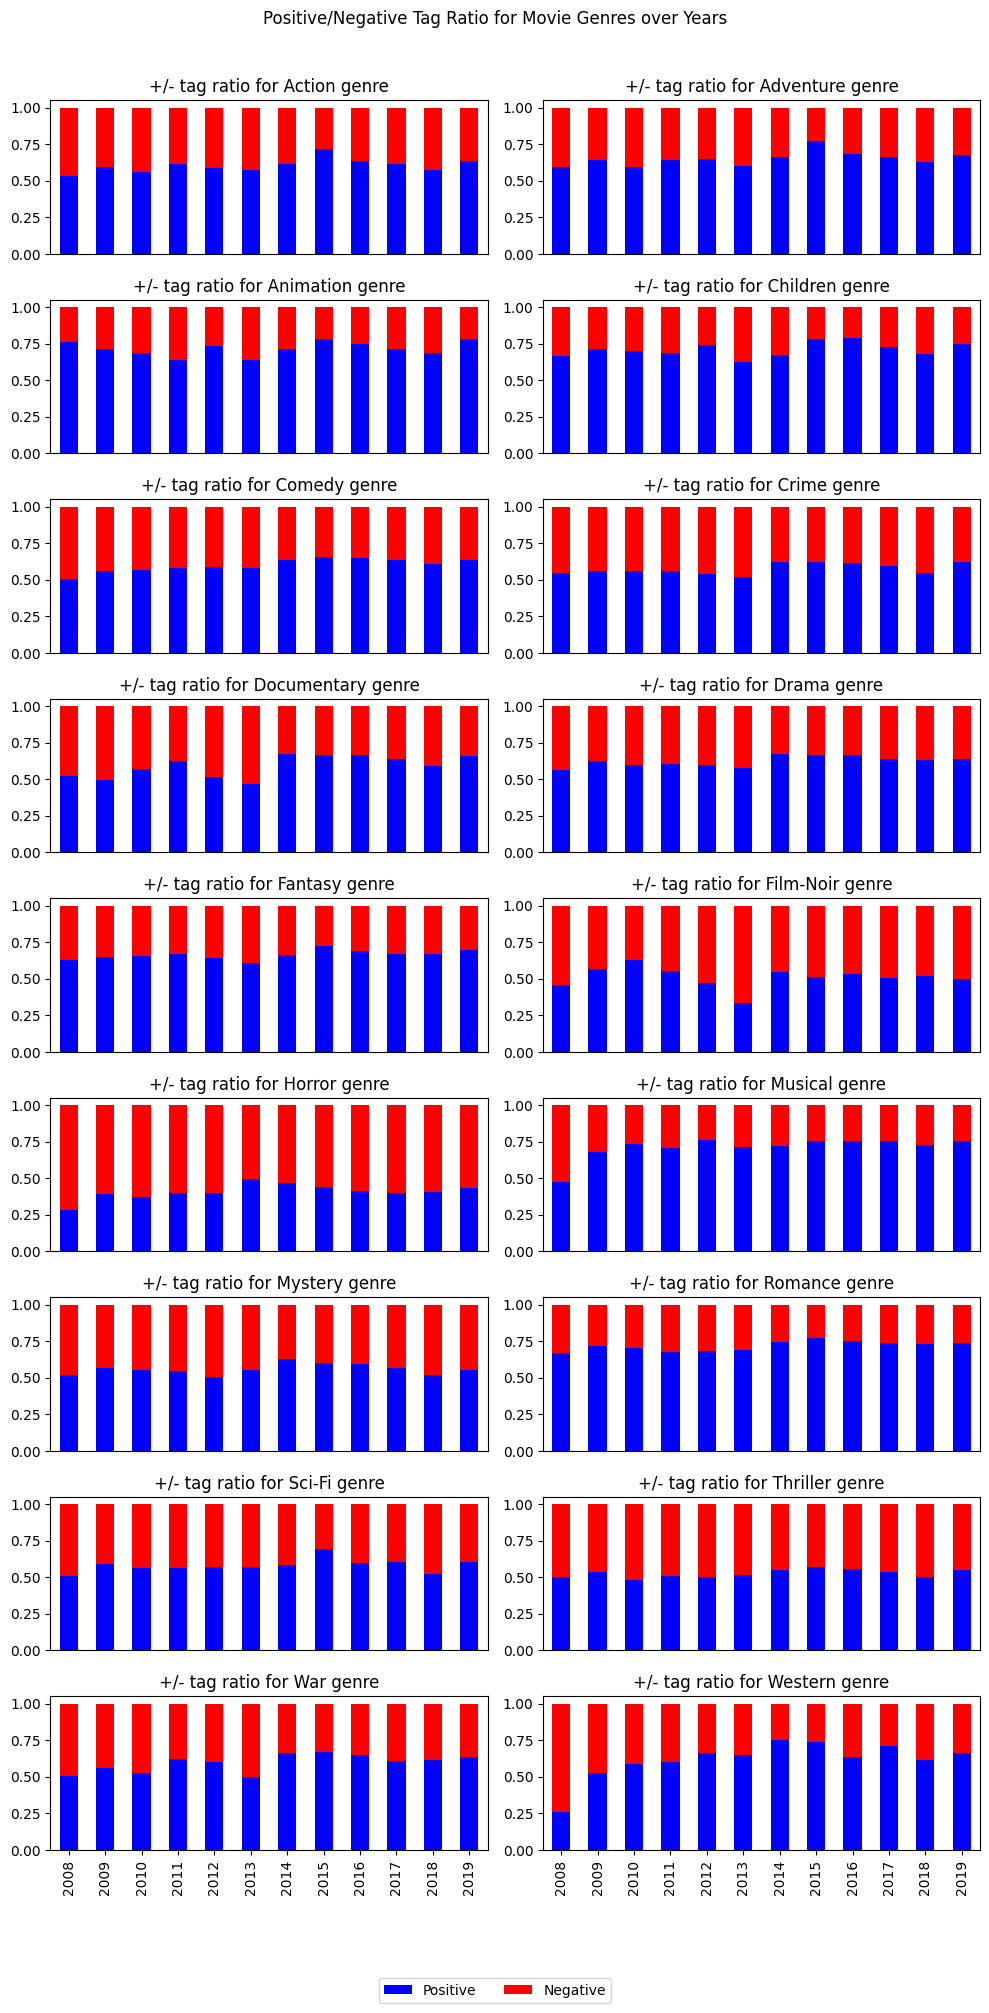

In [ ]:
# Keep only 4 digits of the 'Year' column
ratio_df['Year'] = ratio_df['Year'].astype(str).str[:4]

# Create subplots for each genre
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(10, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over genres and plot the positive and negative ratios
for i, genre in enumerate(genre_cols):
    ax = axes[i]

    # Calculate the negative ratio for each year
    ratio_df[genre + '_Negative'] = 1 - ratio_df[genre]
    ratio_df[genre + '_Positive'] = ratio_df[genre]

    # Plotting the positive and negative ratios for the genre
    ratio_df.plot(x='Year', y=[genre + '_Positive', genre + '_Negative'], kind='bar', stacked=True, ax=ax, color=['blue', 'red'])
    ax.set_xlabel('')
    ax.set_title('+/- tag ratio for {} genre'.format(genre))

    # Remove legend from individual plots
    ax.legend().remove()

    # Remove x-axis labels and ticks for all plots except the last row
    if i < len(genre_cols) - 2:
        ax.set_xticklabels([])
        ax.set_xticks([])

# Create a common legend for the entire figure
fig.legend(['Positive', 'Negative'], loc='lower center', bbox_to_anchor=(0.5, -0.02), ncol=2)

# Add a common title for the entire figure
fig.suptitle('Positive/Negative Tag Ratio for Movie Genres over Years')

# Adjust the spacing between subplots and legend
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Display the plot
plt.show()
